In [223]:
# Import packages
import pandas as pd
import numpy as np

# Import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [158]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
combine = [df_train, df_test]

In [159]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [161]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [162]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [163]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


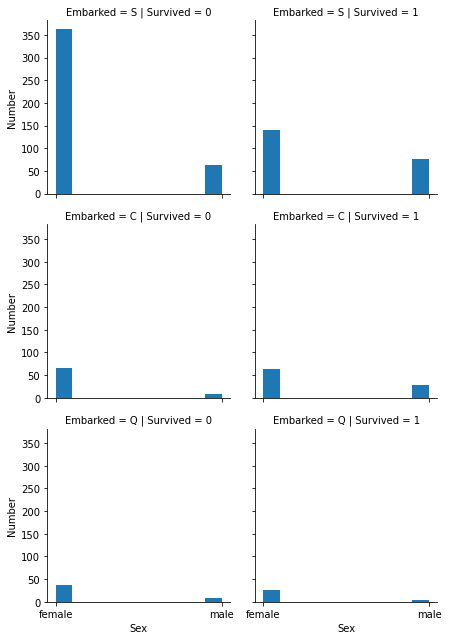

In [164]:
sex_grid = sns.FacetGrid(df_train, col='Survived', row='Embarked')
sex_grid.map(plt.hist, 'Sex')
sex_grid.set_ylabels('Number')
sex_grid.add_legend()

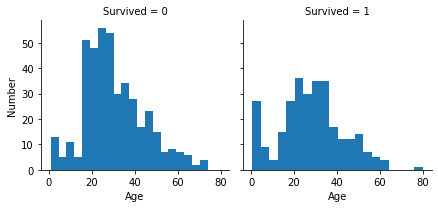

In [165]:
age_hist = sns.FacetGrid(df_train, col='Survived')
age_hist.map(plt.hist, 'Age', bins=20)
age_hist.set_ylabels('Number')

In [222]:
# Creating age groups
def age_to_group(age):
    if age < 18:
        return 'Children'
    elif age > 60: 
        return 'Elderly'
    else:
        return 'Adults'
    
df_train['ageGRP'] = df_train['Age'].apply(age_to_group)  

In [167]:
df_train['ageGRP']

0      Adults
1      Adults
2      Adults
3      Adults
4      Adults
        ...  
886    Adults
887    Adults
888    Adults
889    Adults
890    Adults
Name: ageGRP, Length: 891, dtype: object

In [168]:
df_train['ageGRP'].head()

0    Adults
1    Adults
2    Adults
3    Adults
4    Adults
Name: ageGRP, dtype: object

In [169]:
df_train['Age'][5]

nan

In [170]:
df_train[['Age', 'ageGRP']]

,Age,ageGRP
0,22.0,Adults
1,38.0,Adults
2,26.0,Adults
3,35.0,Adults
4,35.0,Adults
...,...,...
886,27.0,Adults
887,19.0,Adults
888,NaN,Adults
889,26.0,Adults


In [171]:
df_train[['ageGRP','Survived']].groupby(['ageGRP'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,ageGRP,Survived
1,Children,0.539823
0,Adults,0.365079
2,Elderly,0.227273


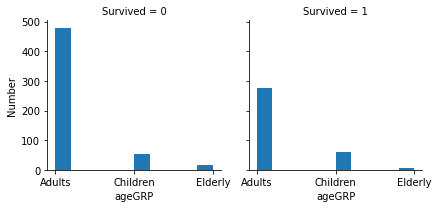

In [172]:
age = sns.FacetGrid(df_train, col='Survived')
age = age.map(plt.hist, 'ageGRP')
age.set_ylabels('Number')

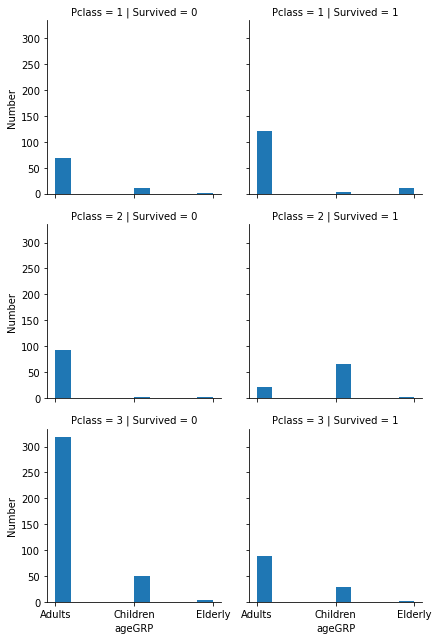

In [173]:
pclass = sns.FacetGrid(df_train, col='Survived', row='Pclass')
pclass.map(plt.hist, 'ageGRP')
pclass.set_ylabels('Number')

In [174]:
df_train.Age.isnull().sum()

177

In [175]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGRP
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Adults
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Adults
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Adults


In [176]:
df_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [177]:
# Missing values
data = [df_train, df_test]

for dataset in data:
    mean = df_train["Age"].mean()
    std = df_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df_train["Age"].astype(int)
df_train["Age"].isnull().sum()

0

In [178]:
# Creating age groups
data = [df_train, df_test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
    
df_train['Age'].value_counts()

4    161
6    160
5    151
3    144
2    117
1     90
0     68
Name: Age, dtype: int64

In [179]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGRP
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,7.2500,NaN,S,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,71.2833,C85,C,Adults
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,53.1000,C123,S,Adults
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,8.0500,NaN,S,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,3,0,0,211536,13.0000,NaN,S,Adults
887,888,1,1,"Graham, Miss. Margaret Edith",1,2,0,0,112053,30.0000,B42,S,Adults
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,3,1,2,W./C. 6607,23.4500,NaN,S,Adults
889,890,1,1,"Behr, Mr. Karl Howell",0,3,0,0,111369,30.0000,C148,C,Adults


In [180]:
df_train[['PassengerId', 'Age', 'Sex', 'Pclass']].head(10)

,PassengerId,Age,Sex,Pclass
0,1,2,0,3
1,2,5,1,1
2,3,3,1,3
3,4,5,1,1
4,5,5,0,3
5,6,3,0,3
6,7,6,0,1
7,8,0,0,3
8,9,3,1,3
9,10,1,1,2


In [181]:
# Final check for null values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
ageGRP           0
dtype: int64

In [182]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGRP
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,7.2500,NaN,S,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,71.2833,C85,C,Adults
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,53.1000,C123,S,Adults
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,8.0500,NaN,S,Adults


In [183]:
df_train = df_train.drop(['Fare'], axis=1)

In [184]:
df_train = df_train.drop(['Ticket'], axis=1)
df_train = df_train.drop(['Cabin'], axis=1)
df_train = df_train.drop(['Embarked'], axis=1)
df_train = df_train.drop(['Name'], axis=1)
df_train = df_train.drop(['SibSp'], axis=1)
df_train = df_train.drop(['Parch'], axis=1)
df_train = df_train.drop(['PassengerId'], axis=1)

In [186]:
df_train = df_train.drop(['ageGRP'], axis=1)

In [187]:
df_train.head()

,Survived,Pclass,Sex,Age
0,0,3,0,2
1,1,1,1,5
2,1,3,1,3
3,1,1,1,5
4,0,3,0,5


In [188]:
df_test = df_test.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Embarked'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
df_test = df_test.drop(['SibSp'], axis=1)
df_test = df_test.drop(['Parch'], axis=1)

In [192]:
combine = [df_train, df_test]
df_train.head()

,Survived,Pclass,Sex,Age
0,0,3,0,2
1,1,1,1,5
2,1,3,1,3
3,1,1,1,5
4,0,3,0,5


In [193]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,0,2,7.8292
1,893,3,1,5,7.0000
2,894,2,0,3,9.6875
3,895,3,0,5,8.6625
4,896,3,1,5,12.2875


In [194]:
df_test = df_test.drop(['Fare'], axis=1)

In [195]:
df_test.head()

,PassengerId,Pclass,Sex,Age
0,892,3,0,2
1,893,3,1,5
2,894,2,0,3
3,895,3,0,5
4,896,3,1,5


In [196]:
# Building Machine Learing Models
X_train = df_train.drop('Survived', axis=1)
Y_train = df_train['Survived']
X_test = df_test.drop('PassengerId', axis=1).copy()

In [199]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
acc_log = round(log_reg.score(X_train,Y_train)*100, 2)
acc_log

78.79

In [200]:
# K-Nearest Neighbors/KNNs
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) *100, 2)
acc_knn

79.91

In [201]:
# Decision Trees
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, Y_train)
Y_pred = dec_tree.predict(X_test)
acc_tree = round(dec_tree.score(X_train, Y_train)*100, 2)
acc_tree

81.82

In [202]:
# Random Forest
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, Y_train)
Y_pred = rand_forest.predict(X_test)
acc_forest = round(rand_forest.score(X_train, Y_train) *100 , 2)
acc_forest

81.82

In [221]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svm = round(svc.score(X_train, Y_train) *100 ,2)
acc_svm

79.01

In [204]:
# Final Solution
model = pd.DataFrame({'Method': ['Logistic Regression','SVM','KNN','Decision Trees','Random Forest'], 
                      'Score': [acc_log, acc_svm, acc_knn, acc_tree, acc_forest]})
model.sort_values(by='Score', ascending=False)

,Method,Score
3,Decision Trees,81.82
4,Random Forest,81.82
2,KNN,79.91
1,SVM,79.01
0,Logistic Regression,78.79


In [214]:
# Feature Importance - Random Forest
feature_imp = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rand_forest.feature_importances_,3)})
feature_imp = feature_imp.sort_values('importance',ascending=False).set_index('feature')
feature_imp

,importance
feature,
Sex,0.603
Pclass,0.263
Age,0.135


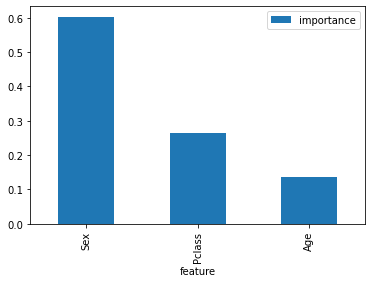

In [217]:
feature_imp.plot.bar()

In [216]:
# Feature Importance - Logistic Regression
coeff_df = pd.DataFrame(df_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(log_reg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.535957
2,Age,-0.180960
0,Pclass,-1.078673


In [220]:
# Final survival prediction
fin_pred = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred
    })
fin_pred.to_csv('Survival_Prediction.csv', index=False)